## Project 1 - Academic Journal Analysis in Web of Science
### Kristine Nolin and Carol Wittig

In [1]:
# Dependencies
import csv
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint

In [2]:
#load file from CSV
ur_pubs_old = pd.read_csv("UR_pubs.csv", low_memory=False)
ur_pubs_old.head()

#Convert the Publication Year to an Integer without a decimal float
ur_pubs_old["Publication Year"] = ur_pubs_old["Publication Year"].fillna(0.0).astype(int)

ur_pubs_old


,Authors,Title,Journal Title,Volume,Issue,Beginning Page,Ending Page,DOI,Publication Date,Publication Year,...,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291
0,"Mago, Shakun D.; Sheremeta, Roman M.",New Hampshire Effect: behavior in sequential a...,EXPERIMENTAL ECONOMICS,22,2,325,349,10.1007/s10683-018-9569-0,19-Jun,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kotler, Philip; Manrai, Lalita A.; Lascu, Dana...",Influence of country and company characteristi...,INTERNATIONAL BUSINESS REVIEW,28,3,482,498,10.1016/j.ibusrev.2018.11.006,19-Jun,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Joshi, Piyush; Darr, Andrew J.; Skromne, Isaac",CDX4 regulates the progression of neural matur...,DEVELOPMENTAL BIOLOGY,449,2,132,142,10.1016/j.ydbio.2019.02.014,MAY 15 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Park, Hyejin; McEachon, Joseph D., II; Pollock...",Synthesis and characterization of hydrogen per...,BIOORGANIC & MEDICINAL CHEMISTRY,27,10,2075,2082,10.1016/j.bmc.2019.04.003,MAY 15 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Duer, M.; Schmidt, A.; Pybus, J. R.; Segarra, ...",Direct Observation of Proton-Neutron Short-Ran...,PHYSICAL REVIEW LETTERS,122,17,NaN,NaN,10.1103/PhysRevLett.122.172502,MAY 3 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Burnette, Jeni L.; Forsyth, Rachel B.; Desmara...",MINDSETS OF ADDICTION: IMPLICATIONS FOR TREATM...,JOURNAL OF SOCIAL AND CLINICAL PSYCHOLOGY,38,5,367,394,10.1521/jscp.2019.38.5.367,19-May,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Roy, P.; Park, S.; Crede, V.; Anisovich, A. V....",First Measurements of the Double-Polarization ...,PHYSICAL REVIEW LETTERS,122,16,NaN,NaN,10.1103/PhysRevLett.122.162301,APR 23 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Kentner, Amanda C.; Lambert, Kelly G.; Hannan,...",Editorial: Environmental Enrichment: Enhancing...,FRONTIERS IN BEHAVIORAL NEUROSCIENCE,13,NaN,NaN,NaN,10.3389/fnbeh.2019.00075,APR 16 2019,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Aldana, Elis; Otalora-Luna, Fernando","Artistic Notion of Mimicry, a Case Study: Does...",BIOSEMIOTICS,12,1,157,174,10.1007/s12304-019-09351-1,19-Apr,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Meyer, Manuella",MADHOUSE: PSYCHIATRY AND POLITICS IN CUBAN HIS...,JOURNAL OF THE HISTORY OF THE BEHAVIORAL SCIENCES,55,2,167,169,10.1002/jhbs.21968,19-Apr,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Deleted unnecessary columns

ur_pubs = ur_pubs_old[["Author 1", "Author 2", "Author 3", "Author 4", "Author 5", "Title", "Journal Title", "Volume", "Issue", "DOI", "Publication Date", "Publication Year"]]

ur_pubs.head()
#ur_pubs.count()

,Author 1,Author 2,Author 3,Author 4,Author 5,Title,Journal Title,Volume,Issue,DOI,Publication Date,Publication Year
0,"Mago, S.","Sheremeta, Roman M.",NaN,NaN,NaN,New Hampshire Effect: behavior in sequential a...,EXPERIMENTAL ECONOMICS,22,2,10.1007/s10683-018-9569-0,19-Jun,2019
1,"Kotler, P.","Manrai, Lalita A.","Lascu, Dana-Nicoleta","Manrai, Ajay K.",NaN,Influence of country and company characteristi...,INTERNATIONAL BUSINESS REVIEW,28,3,10.1016/j.ibusrev.2018.11.006,19-Jun,2019
2,"Joshi, P.","Darr, Andrew J.","Skromne, Isaac",NaN,NaN,CDX4 regulates the progression of neural matur...,DEVELOPMENTAL BIOLOGY,449,2,10.1016/j.ydbio.2019.02.014,MAY 15 2019,2019
3,"Park, H.","McEachon, Joseph D., II","Pollock, Julie A.",NaN,NaN,Synthesis and characterization of hydrogen per...,BIOORGANIC & MEDICINAL CHEMISTRY,27,10,10.1016/j.bmc.2019.04.003,MAY 15 2019,2019
4,"Duer, M.","Schmidt, A.","Pybus, J. R.","Segarra, E. P.","Hrnjic, A.",Direct Observation of Proton-Neutron Short-Ran...,PHYSICAL REVIEW LETTERS,122,17,10.1103/PhysRevLett.122.172502,MAY 3 2019,2019


In [4]:
#Grouped journals by title

journal_grouping = ur_pubs.groupby(['Journal Title'])
journal_grouping.count()
joe = journal_grouping.count()
joe.head()

,Author 1,Author 2,Author 3,Author 4,Author 5,Title,Volume,Issue,DOI,Publication Date,Publication Year
Journal Title,,,,,,,,,,,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2,2,2,0,0,2,2,2,2,2,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188,137,95,64,38,188,188,9,0,188,188
ACADEMIC THERAPY,1,0,0,0,0,1,1,1,1,1,1
ACADEMY OF MANAGEMENT ANNALS,1,1,1,1,1,1,1,0,1,1,1
ACADEMY OF MANAGEMENT EXECUTIVE,2,2,2,1,0,2,2,2,2,2,2


In [5]:
#Grouped by Journal title -- and counted the individual publications within each journal

journal_grouping = ur_pubs.groupby(['Journal Title']).count()[["Title"]]

journal_grouping.head()

,Title
Journal Title,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
ACADEMIC THERAPY,1
ACADEMY OF MANAGEMENT ANNALS,1
ACADEMY OF MANAGEMENT EXECUTIVE,2


## Carol - CREATE BAR GRAPH FOR Journal Count
    ### Bad version is full list -- recreate with top 10 in Bar Graph
## Kristine - Pie Chart - top 10

In [6]:
##Bar Graph for Journal Count - ALL -- way too big (saved as BAD Graph by comparison)

# journal_grouping = journal_grouping.plot(kind="bar", title="Count of Journals by Title")
# journal_grouping.set_xlabel("Journal Title")
# journal_grouping.set_ylabel("Count by Title")

# plt.savefig("Bad_Graphs_Count-Journals-Title.png")
# #plt.show()

In [7]:
#Rename Columns
journal_grouping = journal_grouping.rename(columns={"Title":"Count by Title"})
journal_grouping.head()

,Count by Title
Journal Title,
ABACUS-A JOURNAL OF ACCOUNTING FINANCE AND BUSINESS STUDIES,2
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
ACADEMIC THERAPY,1
ACADEMY OF MANAGEMENT ANNALS,1
ACADEMY OF MANAGEMENT EXECUTIVE,2


In [8]:
#Sort journals by title - count and sort alphabetically
journal_sort = journal_grouping.sort_values(["Count by Title"], ascending=False)
top_journal_grouping = journal_sort.nlargest(10, ["Count by Title"], keep="first")
top_journal_grouping

,Count by Title
Journal Title,
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
PHYSICAL REVIEW C,145
FASEB JOURNAL,136
LIBRARY JOURNAL,70
PHYSICAL REVIEW LETTERS,60
AMERICAN HISTORICAL REVIEW,36
JOURNAL OF AMERICAN HISTORY,34
PERCEPTUAL AND MOTOR SKILLS,32
WILLIAM AND MARY QUARTERLY,31


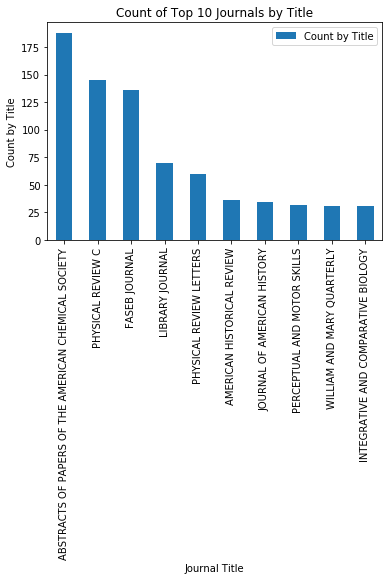

<Figure size 432x288 with 0 Axes>

In [9]:
##Bar Graph for Journal Count - ALL -- way too big (saved as BAD Graph by comparison)

top_journal_grouping = top_journal_grouping.plot(kind="bar", title="Count of Top 10 Journals by Title")
top_journal_grouping.set_xlabel("Journal Title")
top_journal_grouping.set_ylabel("Count by Title")


plt.savefig("Count-Journals-Title.png", bbox_inches = "tight")
plt.show()
plt.tight_layout()

In [10]:
#Sorted Journal Titles by # of publications - Highest to Lowest

journal_sort = journal_grouping.sort_values(["Count by Title"], ascending=False)
top_journal_sort=journal_sort.nlargest(10, ['Count by Title'], keep="first")
top_journal_sort

,Count by Title
Journal Title,
ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SOCIETY,188
PHYSICAL REVIEW C,145
FASEB JOURNAL,136
LIBRARY JOURNAL,70
PHYSICAL REVIEW LETTERS,60
AMERICAN HISTORICAL REVIEW,36
JOURNAL OF AMERICAN HISTORY,34
PERCEPTUAL AND MOTOR SKILLS,32
WILLIAM AND MARY QUARTERLY,31


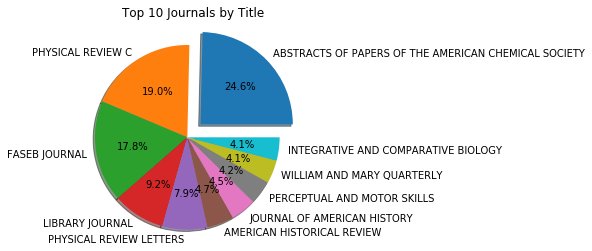

In [11]:
# labels=top_journal_sort["Journal Title"]
labels=top_journal_sort.index.values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(top_journal_sort["Count by Title"],labels=labels, explode = explode, shadow = True, startangle = 0, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Top 10 Journals by Title")

# Save Figure
plt.savefig("Top 10 Journals By Title.png", bbox_inches = "tight")
plt.show()

## Total Publications per Year
### Line Graph and Horizontal Bar Graph (# of titles - x axis; pub year - y axis

In [12]:
#Identified TOTAL publications per year

yearly_publications = ur_pubs.groupby(["Publication Year"]).count()[["Title"]]
cleaned_yearly_publications = yearly_publications.drop([0])
cleaned_yearly_publications.head()


,Title
Publication Year,
1976,20
1977,20
1978,37
1979,34
1980,48


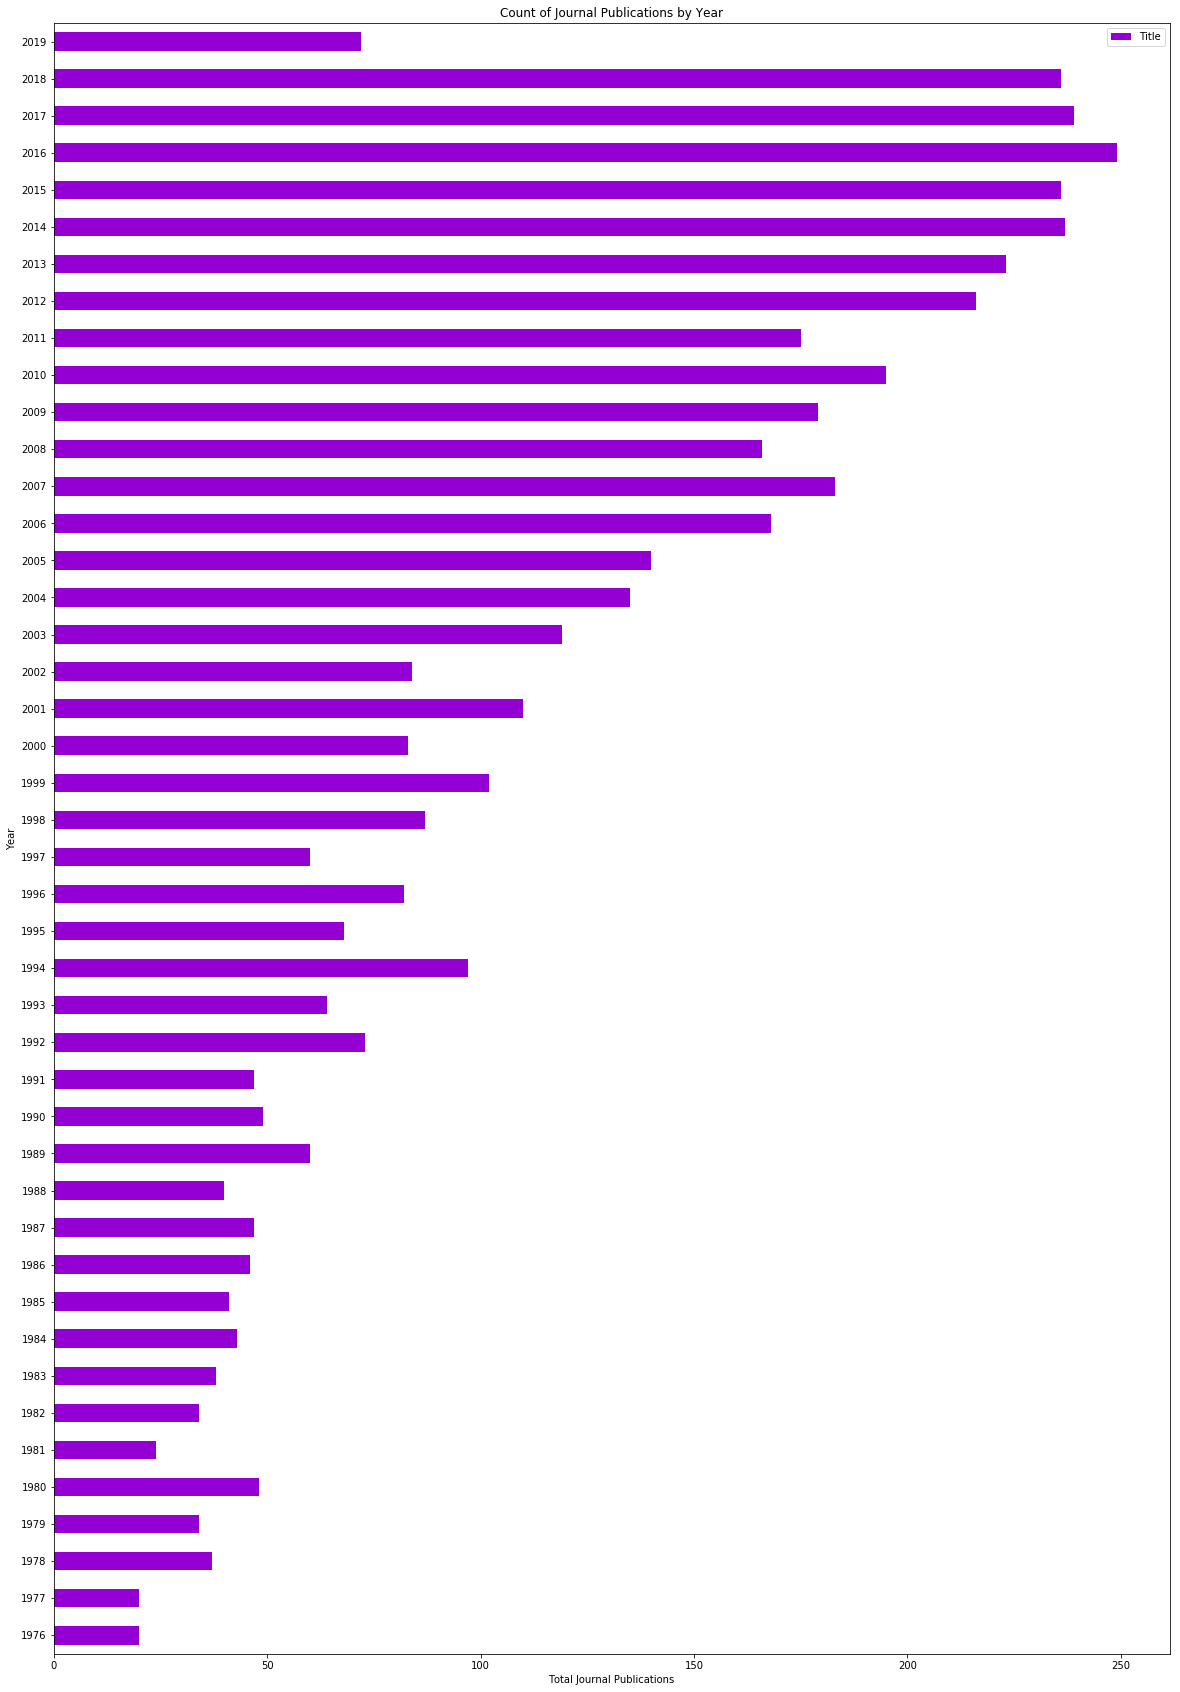

In [13]:
##Horizontal Bar Graph - Journal Totals by Publication Year

cleaned_yearly_publications = cleaned_yearly_publications.plot(kind="barh", color="darkviolet", title="Count of Journal Publications by Year", figsize=(20, 30))
cleaned_yearly_publications.set_xlabel("Total Journal Publications")
cleaned_yearly_publications.set_ylabel("Year")


plt.savefig("Count-Journals-by-YEAR.png")
plt.show()




<function matplotlib.pyplot.show(*args, **kw)>

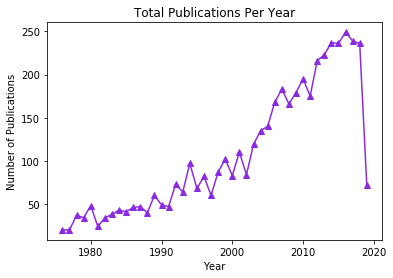

In [14]:
#Identified and plotted TOTAL publications per year

yearly_publications = ur_pubs.groupby(["Publication Year"]).count()[["Title"]]
cleaned_yearly_publications=yearly_publications.drop([0])
clean_yearly_pubs=cleaned_yearly_publications.drop([2019])

plt.plot(cleaned_yearly_publications, marker = "^", c="blueviolet")
plt.title("Total Publications Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.savefig("Total Publications Per Year.png", bbox_inches = "tight")
plt.show

## Publications Per Journal / Per Year

In [15]:
#Identified and sorted publications per journal per year

yearly_publications = ur_pubs.groupby(["Publication Year", "Journal Title"]).count()[["Title"]]
yearly_publications

Title
Publication Year Journal Title                                            
1976             AMERICAN MATHEMATICAL MONTHLY                           1
                 COPEIA                                                  1
                 ELH-ENGLISH LITERARY HISTORY                            1
                 FEDERATION PROCEEDINGS                                  1
                 JOURNAL OF EXPERIMENTAL ZOOLOGY                         2
                 JOURNAL OF GENERAL PSYCHOLOGY                           1
                 JOURNAL OF PRESBYTERIAN HISTORY                         1
                 JOURNAL OF THE WEST                                     2
                 NEW-YORK HISTORICAL SOCIETY QUARTERLY                   1
                 PARLIAMENTARY AFFAIRS                                   1
                 RESOURCES FOR AMERICAN LITERARY STUDY                   1
                 SOUTHERN HUMANITIES REVIEW                              2
                 VIRGINIA MAGAZINE OF HISTORY AND BIOGRAPHY              5
1977             ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SO...      1
                 AMERICAN MATHEMATICAL MONTHLY                           1
                 AMERICAN POETRY REVIEW                                  3
                 AMERICAN SCIENTIST                                      1
                 AMERICAN ZOOLOGIST                                      1
                 BIOCHEMISTRY                                            1
                 ESPRIT CREATEUR                                         1
                 FOREIGN LANGUAGE ANNALS                                 1
                 INTERNATIONAL REVIEW OF HISTORY AND POLITICAL S...      1
                 JOURNAL OF EXPERIMENTAL ZOOLOGY                         1
                 JOURNAL OF SOUTHERN HISTORY                             3
                 MUSICAL QUARTERLY                                       1
                 PROCEEDINGS OF THE AMERICAN MATHEMATICAL SOCIETY        1
                 SMALL GROUP BEHAVIOR                                    1
                 TRANSACTIONS-AMERICAN GEOPHYSICAL UNION                 1
                 YALE JOURNAL OF BIOLOGY AND MEDICINE                    1
1978             ABSTRACTS OF PAPERS OF THE AMERICAN CHEMICAL SO...      2
...                                                                    ...
2019             JOURNAL OF APPLIED SOCIAL PSYCHOLOGY                    1
                 JOURNAL OF BRAND MANAGEMENT                             1
                 JOURNAL OF COSMOLOGY AND ASTROPARTICLE PHYSICS          1
                 JOURNAL OF ETHOLOGY                                     1
                 JOURNAL OF EXPERIMENTAL PSYCHOLOGY-GENERAL              1
                 JOURNAL OF EXPERIMENTAL PSYCHOLOGY-HUMAN PERCEP...      1
                 JOURNAL OF FINANCIAL AND QUANTITATIVE ANALYSIS          1
                 JOURNAL OF HOMOSEXUALITY                                1
                 JOURNAL OF NATURAL HISTORY                              1
                 JOURNAL OF PSYCHOPATHOLOGY AND BEHAVIORAL ASSES...      1
                 JOURNAL OF QUALITY TECHNOLOGY                           1
                 JOURNAL OF SOCIAL AND CLINICAL PSYCHOLOGY               1
                 JOURNAL OF THE ACADEMY OF MARKETING SCIENCE             1
                 JOURNAL OF THE GILDED AGE AND PROGRESSIVE ERA           1
                 JOURNAL OF THE HISTORY OF THE BEHAVIORAL SCIENCES       1
                 LEADERSHIP QUARTERLY                                    1
                 MOLECULAR PHYLOGENETICS AND EVOLUTION                   2
                 NANOMATERIALS                                           1
                 NATURE                                                  1
                 PHYSICAL REVIEW LETTERS                                 3
                 PHYSICS LETTERS B                                       2
                 PL

## Sort Top Authors by Number of Publications

In [16]:
#identify authors for each publication and create dataframe for each
#First author - name cleaned in Excel and standardized to capture complete counts

first_1=pd.DataFrame(ur_pubs['Author 1'].value_counts())
first_1.index.names = ['Author']
first = first_1.rename(columns={"Author 1":"Publications"})
first.head(10)

,Publications
Author,
"Maxwell, L.",66
"Seeman, J.",50
"Daniel, W.",32
"Gunlicks, A.",31
"Summers, C.",30
"Topham, R.",30
"Davis, J.",29
"Howell, Y.",27
"Kenzer, R.",27


In [17]:
#identify authors for each publication and create dataframe for each
second_1 =pd.DataFrame(ur_pubs['Author 2'].value_counts())
second_1.index.names = ['Author']
second = second_1.rename(columns={"Author 2":"Publications (2)"})
second.head()

,Publications (2)
Author,
"Bell, Ellis",43
"Parish, Carol A.",26
"Bell, E",11
"Kukar-Kinney, Monika",11
"Beausang, C. W.",9


In [18]:
#identify authors for each publication and create dataframe for each
third_1 = pd.DataFrame(ur_pubs['Author 3'].value_counts())
third_1.index.names = ['Author']
third = third_1.rename(columns={"Author 3":"Publications (3)"})
third.head()

,Publications (3)
Author,
"Myers, William H.",13
"Leopold, Michael C.",12
"Adhikari, K. P.",11
"Ross, William T.",11
"Parish, Carol A.",10


In [19]:
#identify authors for each publication and create dataframe for each
fourth_1 = pd.DataFrame(ur_pubs['Author 4'].value_counts())
fourth_1.index.names = ['Author']
fourth = fourth_1.rename(columns={"Author 4":"Publications (4)"})
fourth.head()

,Publications (4)
Author,
"Myers, William H.",10
"Bell, Ellis",10
"Sabat, Michal",8
"Harman, W. Dean",8
"Adikaram, D.",8


In [20]:
#identify authors for each publication and create dataframe for each
fifth_1 = pd.DataFrame(ur_pubs['Author 5'].value_counts())
fifth_1.index.names = ['Author']
fifth = fifth_1.rename(columns={"Author 5":"Publications (5)"})
fifth.head()

,Publications (5)
Author,
"Adhikari, K. P.",11
"Harman, W. Dean",10
"Adams, G",9
"Myers, William H.",9
"Sabat, Michal",8


In [21]:
# merge individual author columns and find total publications - each merge with subsequent column
merge_table1 = pd.merge(first, second, on="Author", how="outer")
merge_table1.head(10)

,Publications,Publications (2)
Author,,
"Maxwell, L.",66.0,NaN
"Seeman, J.",50.0,NaN
"Daniel, W.",32.0,NaN
"Gunlicks, A.",31.0,NaN
"Summers, C.",30.0,NaN
"Topham, R.",30.0,NaN
"Davis, J.",29.0,NaN
"Howell, Y.",27.0,NaN
"Kenzer, R.",27.0,NaN


In [22]:
# merge individual author columns and find total publications - each merge with subsequent column
merge_table2= pd.merge(merge_table1, third, on="Author", how="outer")
merge_table2.head(10)

,Publications,Publications (2),Publications (3)
Author,,,
"Maxwell, L.",66.0,NaN,NaN
"Seeman, J.",50.0,NaN,NaN
"Daniel, W.",32.0,NaN,NaN
"Gunlicks, A.",31.0,NaN,NaN
"Summers, C.",30.0,NaN,NaN
"Topham, R.",30.0,NaN,NaN
"Davis, J.",29.0,NaN,NaN
"Howell, Y.",27.0,NaN,NaN
"Kenzer, R.",27.0,NaN,NaN


In [23]:
# merge individual author columns and find total publications - each merge with subsequent column
merge_table3 = pd.merge(merge_table2, fourth, on="Author", how="outer")
merge_table3.head(10)

,Publications,Publications (2),Publications (3),Publications (4)
Author,,,,
"Maxwell, L.",66.0,NaN,NaN,NaN
"Seeman, J.",50.0,NaN,NaN,NaN
"Daniel, W.",32.0,NaN,NaN,NaN
"Gunlicks, A.",31.0,NaN,NaN,NaN
"Summers, C.",30.0,NaN,NaN,NaN
"Topham, R.",30.0,NaN,NaN,NaN
"Davis, J.",29.0,NaN,NaN,NaN
"Howell, Y.",27.0,NaN,NaN,NaN
"Kenzer, R.",27.0,NaN,NaN,NaN


In [24]:
# merge individual author columns and find total publications - each merge with subsequent column
merge_table4 = pd.merge(merge_table3, fifth, on="Author", how="outer")
merge_table4["Total Author Publications"] = merge_table4.sum(axis=1)
merge_table4.head(10)

,Publications,Publications (2),Publications (3),Publications (4),Publications (5),Total Author Publications
Author,,,,,,
"Maxwell, L.",66.0,NaN,NaN,NaN,NaN,66.0
"Seeman, J.",50.0,NaN,NaN,NaN,NaN,50.0
"Daniel, W.",32.0,NaN,NaN,NaN,NaN,32.0
"Gunlicks, A.",31.0,NaN,NaN,NaN,NaN,31.0
"Summers, C.",30.0,NaN,NaN,NaN,NaN,30.0
"Topham, R.",30.0,NaN,NaN,NaN,NaN,30.0
"Davis, J.",29.0,NaN,NaN,NaN,NaN,29.0
"Howell, Y.",27.0,NaN,NaN,NaN,NaN,27.0
"Kenzer, R.",27.0,NaN,NaN,NaN,NaN,27.0


In [25]:
# merge individual author columns and find total publications - each merge with subsequent column
merge_tables_sort = merge_table4.sort_values(["Total Author Publications"], ascending=False)
merge_tables_zero=merge_tables_sort.where(merge_tables_sort.isnull() == False,0)
total_merge=merge_tables_zero.nlargest(10, ['Total Author Publications'], keep="first")
total_merge

,Publications,Publications (2),Publications (3),Publications (4),Publications (5),Total Author Publications
Author,,,,,,
"Maxwell, L.",66.0,0.0,0.0,0.0,0.0,66.0
"Bell, Ellis",0.0,43.0,9.0,10.0,3.0,65.0
"Seeman, J.",50.0,0.0,0.0,0.0,0.0,50.0
"Parish, Carol A.",0.0,26.0,10.0,4.0,4.0,44.0
"Myers, William H.",0.0,3.0,13.0,10.0,9.0,35.0
"Daniel, W.",32.0,0.0,0.0,0.0,0.0,32.0
"Gunlicks, A.",31.0,0.0,0.0,0.0,0.0,31.0
"Summers, C.",30.0,0.0,0.0,0.0,0.0,30.0
"Topham, R.",30.0,0.0,0.0,0.0,0.0,30.0


In [26]:
# show total author publications and print top 10
first10=first.nlargest(10, ['Publications'], keep="first")
first10

,Publications
Author,
"Maxwell, L.",66
"Seeman, J.",50
"Daniel, W.",32
"Gunlicks, A.",31
"Summers, C.",30
"Topham, R.",30
"Davis, J.",29
"Howell, Y.",27
"Kenzer, R.",27


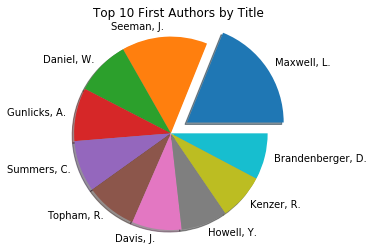

In [27]:
# Plot in PIE CHART - Top 10 First Author at UR
labels=first10.index.values 
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(first10["Publications"],labels=labels, explode=explode,shadow = True, startangle = 0)
plt.axis("equal")
plt.title("Top 10 First Authors by Title")

# Save Figure
plt.savefig("Top 10 First Authors by Title.png", bbox_inches = "tight")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

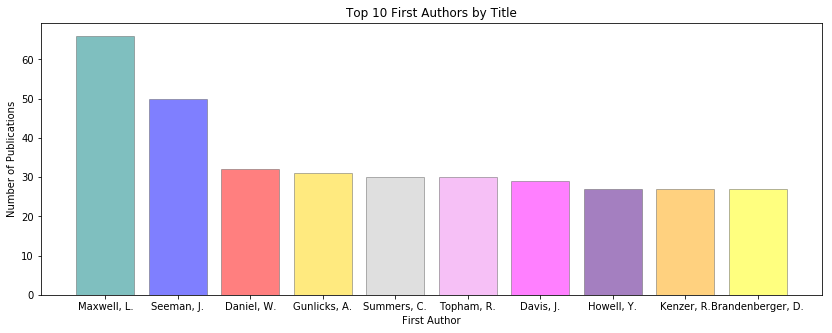

In [30]:
# Bar Graph for Top 10 First Authors
# google inline plot to get rcParams
plt.rcParams["figure.figsize"]=[14,5]
x_axis = first10.index
y_axis = first10["Publications"]
plt.bar(x_axis, y_axis, alpha=0.5, color = ("teal", "blue", "red", "gold", "silver", "violet", "magenta", "indigo", "orange", "yellow"), edgecolor='dimgrey',align="center")
plt.title("Top 10 First Authors by Title")
plt.xlabel("First Author")
plt.ylabel("Number of Publications")
plt.savefig("Bar Top 10 First Authors by Title.png", bbox_inches = "tight")
plt.show


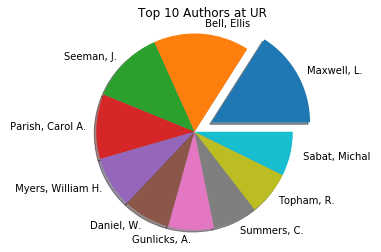

In [28]:
# Plot Top 10 UR Authors Overall by Total Publications

labels=total_merge.index.values
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(total_merge["Total Author Publications"],labels=labels, explode = explode, shadow = True, startangle = 0)
plt.axis("equal")
plt.title("Top 10 Authors at UR")

# Save Figure
plt.savefig("Top 10 Authors at UR.png", bbox_inches = "tight")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

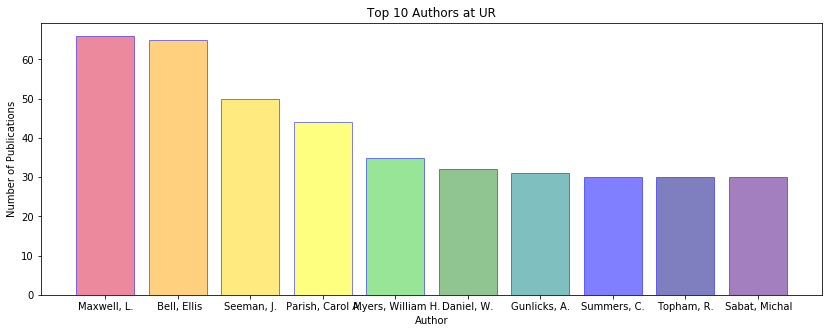

In [31]:
# google inline plot to get rcParams
plt.rcParams["figure.figsize"]=[14,5]
x_axis = total_merge.index
y_axis = total_merge["Total Author Publications"]
plt.label = total_merge["Total Author Publications"]
plt.bar(x_axis, y_axis, alpha=0.5, color = ("crimson", "orange", "gold", "yellow", "limegreen", "forestgreen", "teal", "blue", "navy", "indigo"), align="center", edgecolor='blue')
plt.title("Top 10 Authors at UR")
plt.xlabel("Author")
plt.ylabel("Number of Publications")
plt.savefig("Bar Top 10 Author at UR.png", bbox_inches = "tight")
plt.show
